# Optimize Parameters Welch's Method

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import scipy.signal

## Load Litvak Voxels

In [3]:
#################
# read the data #
#################
f_on_data = '../../data/raw/rest/subj1/on/subj1_on_R7.mat'
f_off_data = '../../data/raw/rest/subj1/off/subj1_off_R7.mat'

on_data = scipy.io.loadmat(f_on_data)['data'][0,0][1][0,0]
on_labels = [i[0][0] for i in scipy.io.loadmat(f_on_data)['data'][0,0][0]]
on_t = scipy.io.loadmat(f_on_data)['data'][0,0][2][0,0][0]

off_data = scipy.io.loadmat(f_off_data)['data'][0,0][1][0,0]
off_labels = [i[0][0] for i in scipy.io.loadmat(f_off_data)['data'][0,0][0]]
off_t = scipy.io.loadmat(f_off_data)['data'][0,0][2][0,0][0]

if np.allclose(np.diff(on_t), np.diff(on_t)[0]):
    on_d = np.diff(on_t)[0]
    on_s_rate = 1./on_d
else:
    raise ValueError('Signal must be evenly sampled')

if np.allclose(np.diff(off_t), np.diff(off_t)[0]):
    off_d = np.diff(off_t)[0]
    off_s_rate = 1./off_d
else:
    raise ValueError('Signal must be evenly sampled')

if not on_labels == off_labels:
    raise ValueError('channel labels must be equal during on and off')

In [4]:
del on_labels[-1] # last entry is event marker

# Calc power spectra using Welch's method and different parameters

# Variation of numbers per segment:

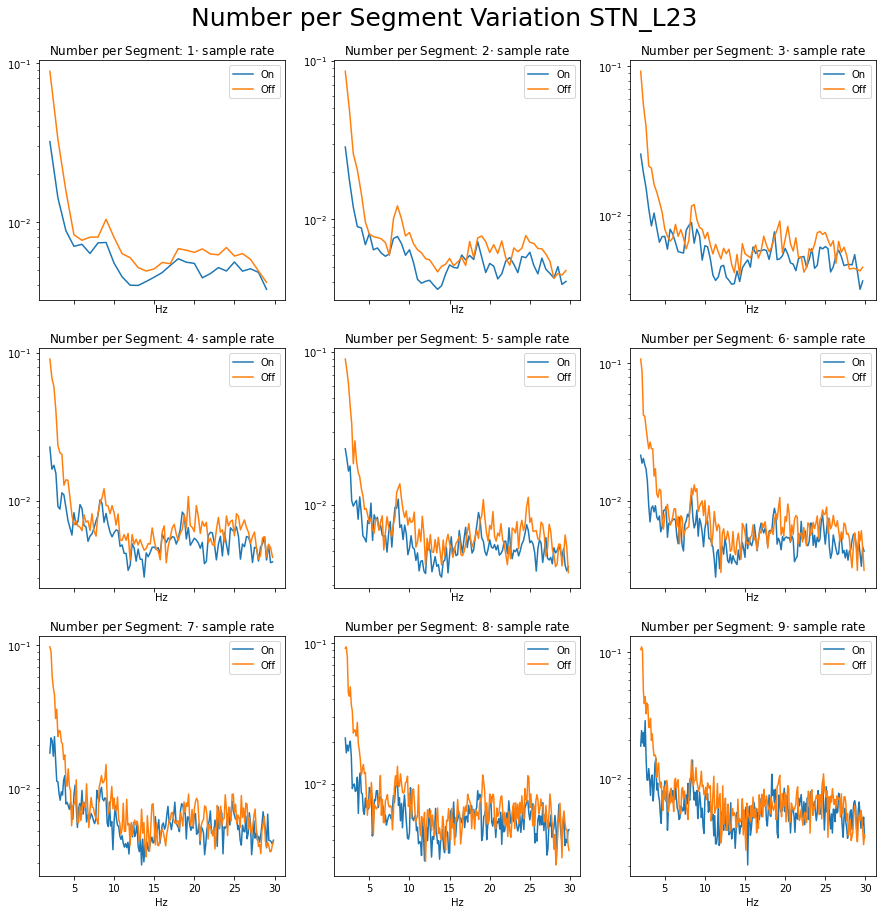

In [19]:
nseg = [1, 2, 3, 4, 5, 6, 7, 8, 9]
_, ax = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=False)
ax = ax.flatten()
for i, n in enumerate(nseg):
    on_f, on_csd = scipy.signal.welch(on_data[8], fs=on_s_rate, nperseg=n*on_s_rate, average="median")
    off_f, off_csd = scipy.signal.welch(off_data[8], fs=off_s_rate, nperseg=n*on_s_rate, average="median")
    f_plot_min = np.where(on_f==2)[0][0]
    f_plot_max = np.where(on_f==30)[0][0]
    #print(on_f[f_plot_min:f_plot_max])
    ax[i].semilogy(on_f[f_plot_min:f_plot_max], np.abs(on_csd[f_plot_min:f_plot_max]), label="On")
    ax[i].semilogy(off_f[f_plot_min:f_plot_max], np.abs(off_csd[f_plot_min:f_plot_max]), label="Off")
    ax[i].set_title(f"Number per Segment: {n}$\cdot$ sample rate")
    ax[i].set_xlabel("Hz")
    ax[i].legend()
plt.suptitle(f"Number per Segment Variation {on_labels[8]}", fontsize=25, position=(0.5, .93))
#plt.savefig('../../plots/subj1_nperseg_variation_STN_L23.pdf')
plt.show()

## Fooof recommends using smooth power spectra - therefore I will choose number per segement = 2 * sample_r

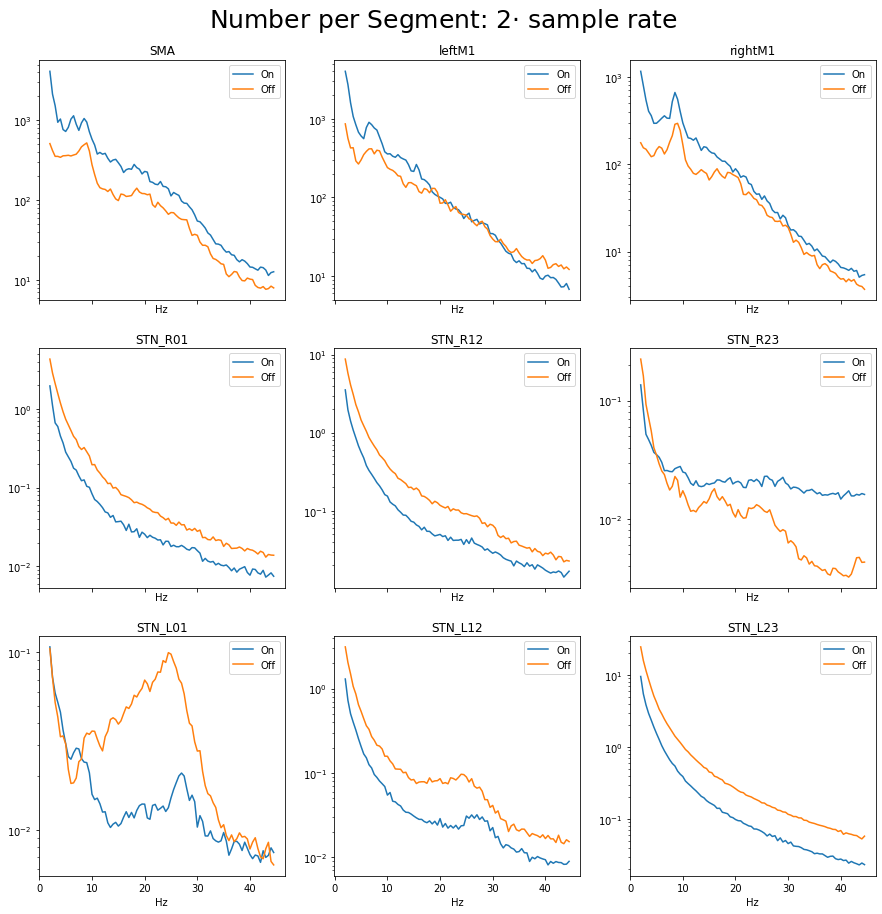

In [24]:
nseg = [2]
_, ax = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=False)
ax = ax.flatten()
for i in range(9):
    on_f, on_csd = scipy.signal.welch(on_data[i], fs=on_s_rate, nperseg=nseg[0]*on_s_rate)
    off_f, off_csd = scipy.signal.welch(off_data[i], fs=off_s_rate, nperseg=nseg[0]*on_s_rate)
    f_plot_min = np.where(on_f==2)[0][0]
    f_plot_max = np.where(on_f==45)[0][0]
    #print(on_f[f_plot_min:f_plot_max])
    ax[i].semilogy(on_f[f_plot_min:f_plot_max], np.abs(on_csd[f_plot_min:f_plot_max]), label="On")
    ax[i].semilogy(off_f[f_plot_min:f_plot_max], np.abs(off_csd[f_plot_min:f_plot_max]), label="Off")
    ax[i].set_title(on_labels[i])
    ax[i].set_xlabel("Hz")
    ax[i].legend()
plt.suptitle(f"Number per Segment: {nseg[0]}$\cdot$ sample rate", fontsize=25, position=(0.5, .93))
#plt.savefig('../../plots/subj1_nperseg_variation_STN_L23.pdf')
plt.show()

## Overlap: no big difference

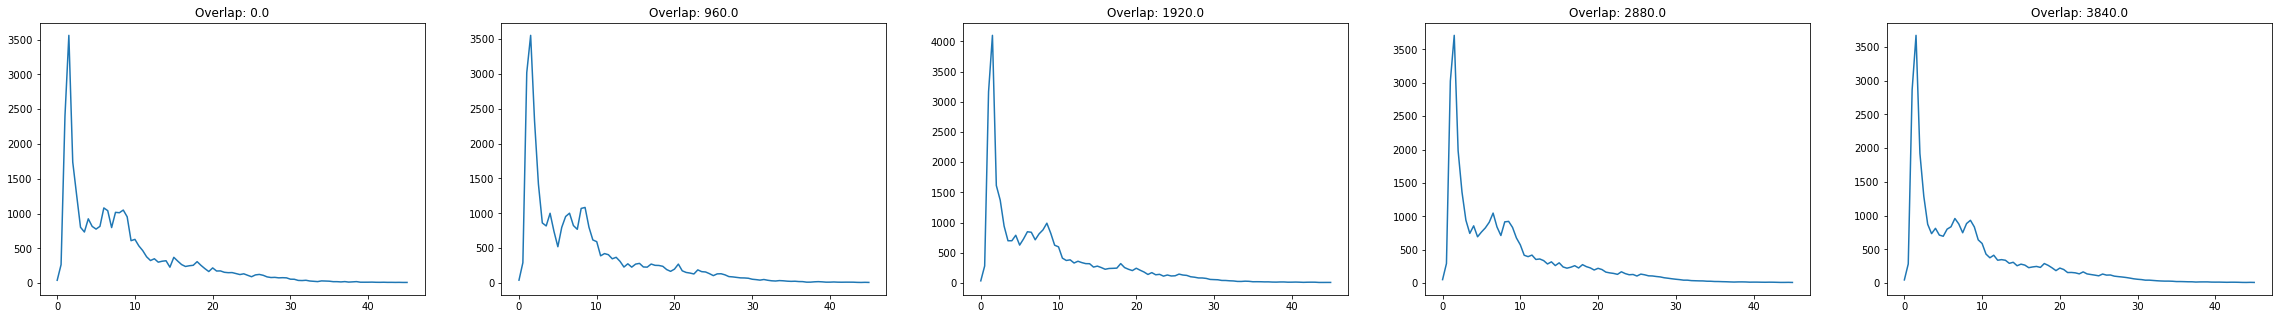

In [25]:
f_plot = 45
_, ax = plt.subplots(1, 5, figsize=(40, 5))
for x in range(5):
    nperseg = 2*on_s_rate
    overlap = nperseg*x/5
    on_f, on_csd = scipy.signal.welch(on_data[0], fs=on_s_rate, nperseg=nperseg, average="median", noverlap=overlap)
    ax[x].plot(on_f[on_f<=f_plot], np.abs(on_csd[on_f<=f_plot]))
    ax[x].set_title(f"Overlap: {overlap:.1f}")
plt.show()

# final parameter: nperseg = 2 * sample_r
# rest: unmodified